# Polynomial Regression

Polymonial expression: $ p(x) = c_0 + c_1 * x + ... + c_n * x^n $

Some examples:

- $y = 3 x^2 +  x + 7$

- $y = 6x^3 + 4 x^2 + 2 x -1$

the power of x can be any, that's polymonial.

## Create a polymonial function by numpy

The numpy API has been refactored. The folloiwng is based on Numpy 1.24 ver. Date: Jan, 2023.

[polymonial 1.24 doc](https://numpy.org/doc/stable/reference/routines.polynomials.html)

1. Create by feeding the xdata and ydata
```python
from numpy.polynomial import Polynomial

p = Polynomial.fit(x, y, deg=4)
```

2. Create by coefficients
$p = 1 + 2x + 3x^2$
```python
coefs = [1, 2, 3]
p = Polynomial(coefs)
```

## Create by sklearn

[Polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

# One feature

## Example 1: Website page speed and purchase 

Let's look at some more realistic-looking page speed / purchase data:

Text(0, 0.5, 'purchase amount')

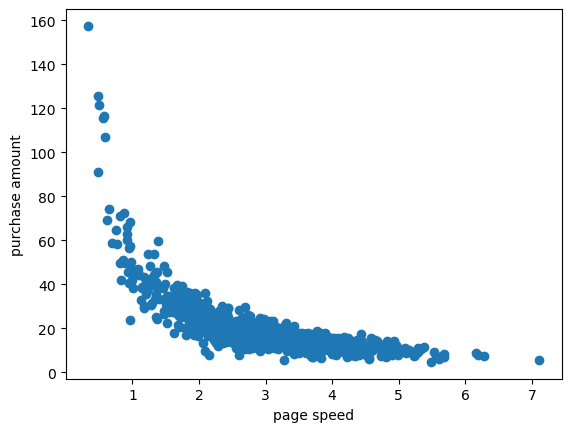

In [1]:
%matplotlib inline
# from pylab import *
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)
plt.xlabel("page speed")
plt.ylabel("purchase amount")

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
from numpy.polynomial import Polynomial

x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p = Polynomial.fit(x, y, 4)

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

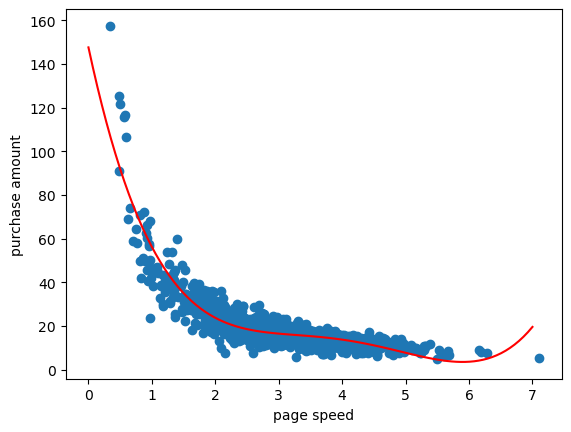

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)

plt.scatter(x, y)
plt.xlabel("page speed")
plt.ylabel("purchase amount")
plt.plot(xp, p(xp), c='r')

4 degree does not seem to be a good degree

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p(x))
r2

0.8293766396303073

Try degree of 2

0.7842354030823269


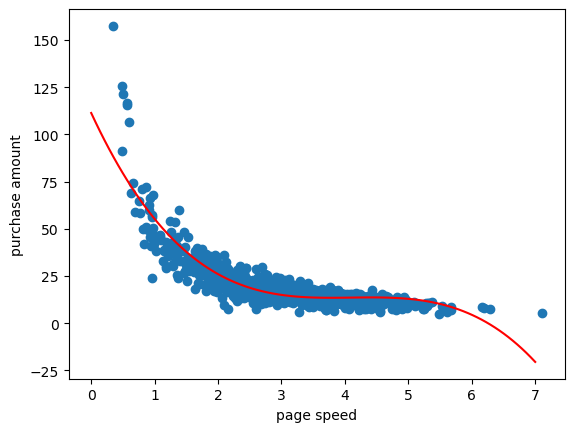

In [5]:
p = Polynomial.fit(x, y, 3)
plt.scatter(x, y)
plt.xlabel("page speed")
plt.ylabel("purchase amount")
plt.plot(xp, p(xp), c='r')

r2 = r2_score(y, p(x))
print(r2)

Well, seems like degree of 4 provided a better result. So let's stick with degree of 4 then. But it might overfit this dataset, be aware.

## Example 2

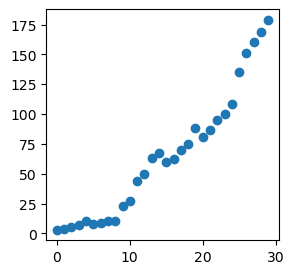

In [6]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(3, 3))
plt.scatter(x, y)
plt.show()

### Create polynomial features

We create a polynomial feature of degree two:

$y = ax^2 + bx + c$

We feed the x array to it, and it gets squared: `[x, x^2]` as a pair


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

x = x.reshape(-1, 1)
poly_features = poly.fit_transform(x) # shorthand for fit(), and transform()

Now, we only have one feature. For more, [polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)

### Train the model

In [8]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(poly_features, y)

LinearRegression()

The model is trained and gave us the coefficient: $y = constant + ax + bx^2$

Let's use this to predict.

In [9]:
y_hat = poly_model.predict(poly_features)

We use the original x to draw our line.

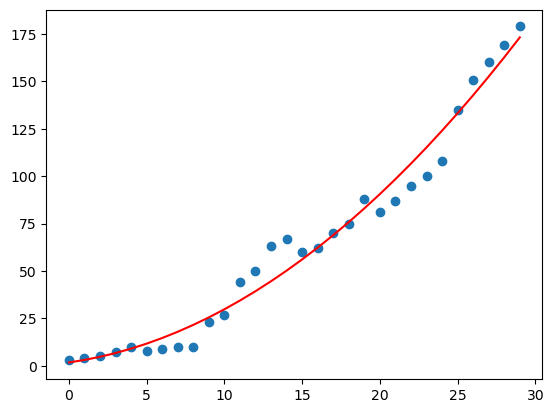

In [10]:
plt.scatter(x, y)
plt.plot(x, y_hat, c="red")
plt.show()

### Use the coeffient to reproduce the output

We know the concept of polynomial, so instead of using the `predict()`, we can create that function ourselves.

In [11]:
print(f"coef: {poly_model.coef_}")
print(f"b: {poly_model.intercept_}")

coef: [1.17020102 0.16361433]
b: 1.708064516129042


The model we get is $y =1.7080 + 1.17020 * x + 0.163614 * x^2 $

In [12]:
def formula(x):
    return 1.7080 + 1.17020 * x + 0.163614 * x ** 2

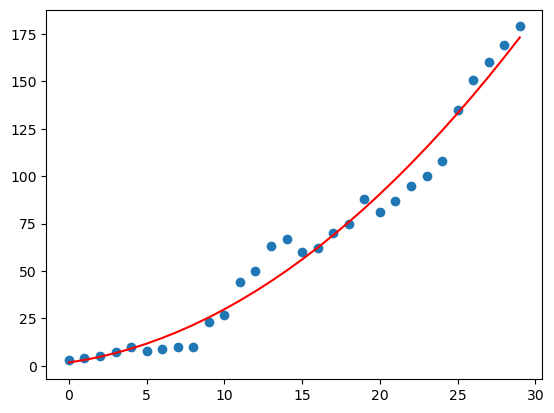

In [13]:
plt.scatter(x, y)
plt.plot(x, formula(x), c="red")
plt.show()